# Let's go

In [89]:
# Import necessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [55]:
# Load the dataset

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [56]:
df.shape

(13320, 9)

In [57]:
# Dropping unnecessary columns

df = df.drop(["availability", "area_type", "society", "balcony"], axis="columns")
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [58]:
# Handling null values

df.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [59]:
# We have enough rows of data, so dropping only a few would not affect much
df = df.dropna()
df.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [60]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [61]:
# 4 BHK and 4 Bedroom features are the same, so let's make them one

df["BHK"] = df["size"].apply(lambda x: int(x.split(" ")[0]))
df = df.drop(["size"], axis=1)
df.head()

<ipython-input-61-105e05b6517c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BHK"] = df["size"].apply(lambda x: int(x.split(" ")[0]))


,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [62]:
df["BHK"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [63]:
df[df.BHK > 20]

,location,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [64]:
# These seem like an error to  me, so I would drop these rows

df = df[df["BHK"] < 20]
df[df.BHK > 20]

,location,total_sqft,bath,price,BHK


In [65]:
df[10:20]

,location,total_sqft,bath,price,BHK
10,Whitefield,1800,2.0,70.0,3
11,Whitefield,2785,5.0,295.0,4
12,7th Phase JP Nagar,1000,2.0,38.0,2
13,Gottigere,1100,2.0,40.0,2
14,Sarjapur,2250,3.0,148.0,3
15,Mysore Road,1175,2.0,73.5,2
16,Bisuvanahalli,1180,3.0,48.0,3
17,Raja Rajeshwari Nagar,1540,3.0,60.0,3
18,Ramakrishnappa Layout,2770,4.0,290.0,3
19,Manayata Tech Park,1100,2.0,48.0,2


In [66]:
df.shape

(13244, 5)

In [67]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [68]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [69]:
# Identifying range values
df[~df["total_sqft"].apply(is_float)]

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [70]:
def convert_sqft_to_num(x):
  tokens = x.split("-")
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [71]:
convert_sqft_to_num("2100 - 2000")

2050.0

In [74]:
df["total_square"] = df["total_sqft"].apply(convert_sqft_to_num)
df = df.drop("total_sqft", axis="columns")
df.head()

,location,bath,price,BHK,total_square
0,Electronic City Phase II,2.0,39.07,2,1056.0
1,Chikka Tirupathi,5.0,120.00,4,2600.0
2,Uttarahalli,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3.0,95.00,3,1521.0
4,Kothanur,2.0,51.00,2,1200.0


In [76]:
df["price_per_sq_feet"] = df["price"]*10000 / df["total_square"]
df.head()

,location,bath,price,BHK,total_square,price_per_sq_feet
0,Electronic City Phase II,2.0,39.07,2,1056.0,369.981061
1,Chikka Tirupathi,5.0,120.00,4,2600.0,461.538462
2,Uttarahalli,2.0,62.00,3,1440.0,430.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,624.589086
4,Kothanur,2.0,51.00,2,1200.0,425.000000


In [77]:
# Handling location column

len(df.location.unique())

1303

In [78]:
df.location = df.location.apply(lambda x: x.strip())

location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
...,...
1 Giri Nagar,1
Kanakapura main Road,1
Karnataka Shabarimala,1


In [79]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,location
location,
1st Block Koramangala,10
Kalkere,10
BTM 1st Stage,10
Dairy Circle,10
Nagappa Reddy Layout,10
...,...
1 Giri Nagar,1
Kanakapura main Road,1
Karnataka Shabarimala,1


In [80]:
# Applying transformation which categorizes less-than-10 values into `other` which is new feature
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df.location.unique())

242

In [81]:
df.head()

,location,bath,price,BHK,total_square,price_per_sq_feet
0,Electronic City Phase II,2.0,39.07,2,1056.0,369.981061
1,Chikka Tirupathi,5.0,120.00,4,2600.0,461.538462
2,Uttarahalli,2.0,62.00,3,1440.0,430.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,624.589086
4,Kothanur,2.0,51.00,2,1200.0,425.000000


In [83]:
df.shape

(13244, 6)

In [84]:
#Deleting rows where square per room is less than 300

df = df[~(df.total_square/df.BHK<300)]
df.shape

(12502, 6)

In [88]:
# Removing outliers

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sq_feet)
        st = np.std(subdf.price_per_sq_feet)
        reduced_df = subdf[(subdf.price_per_sq_feet>(m-st)) & (subdf.price_per_sq_feet<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(10241, 6)

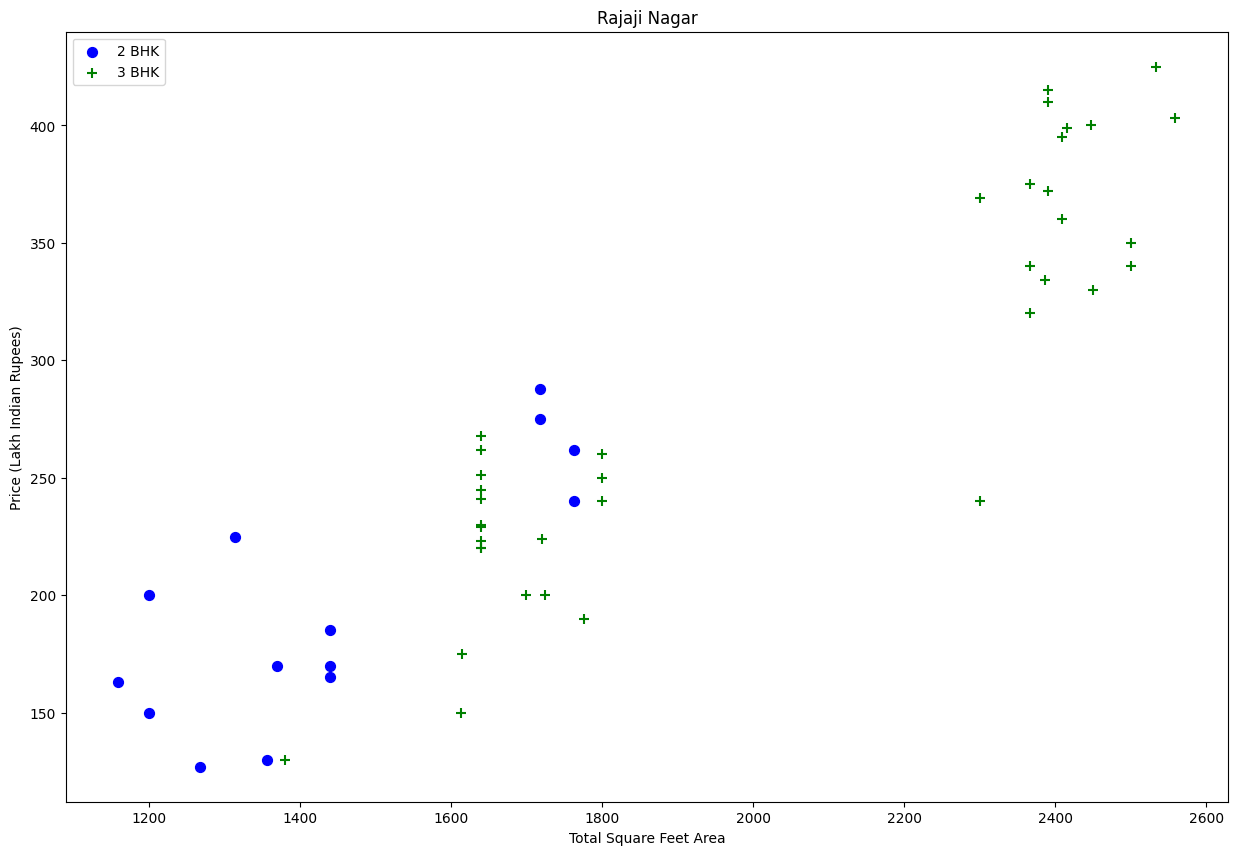

In [92]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_square,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_square,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df,"Rajaji Nagar")

In [97]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sq_feet),
                'std': np.std(bhk_df.price_per_sq_feet),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sq_feet<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
df.shape

(7329, 6)

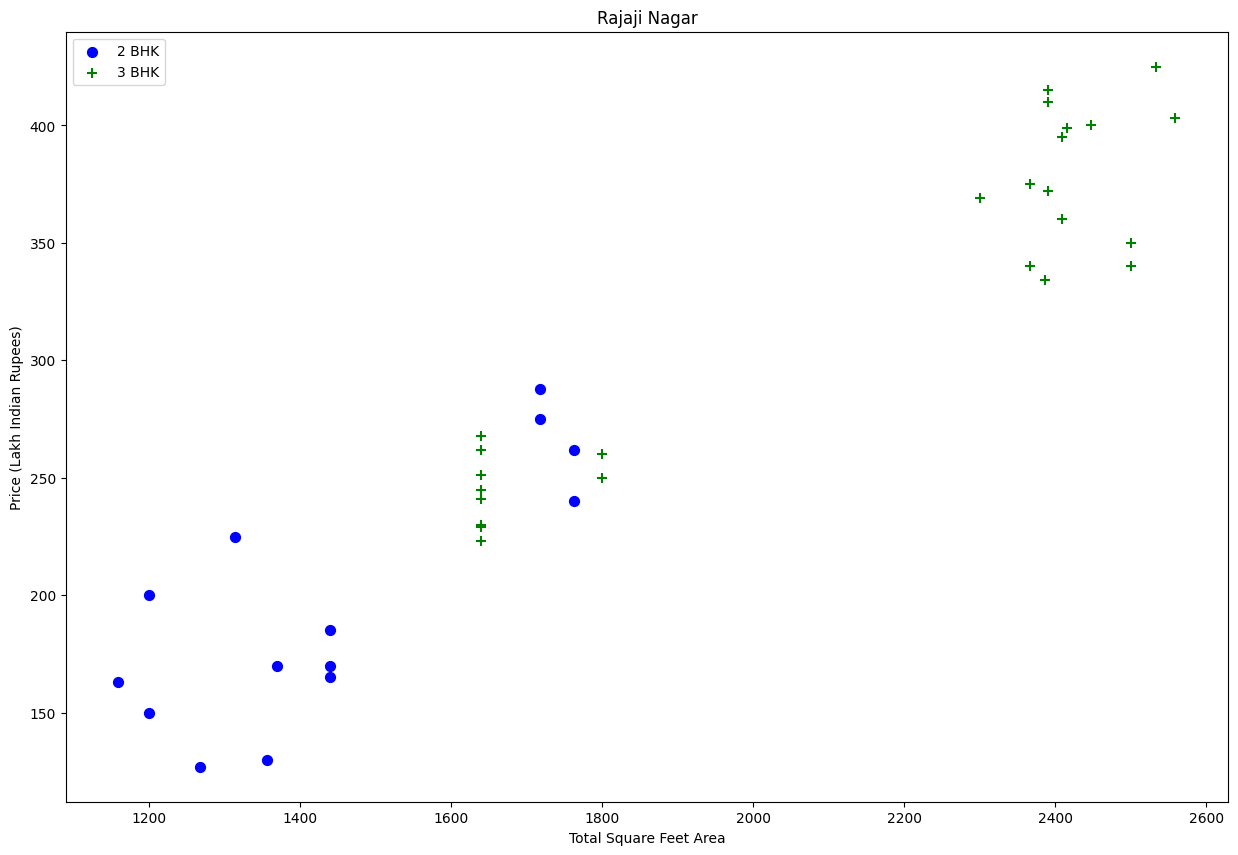

In [99]:
plot_scatter_chart(df,"Rajaji Nagar")

Text(0, 0.5, 'Count')

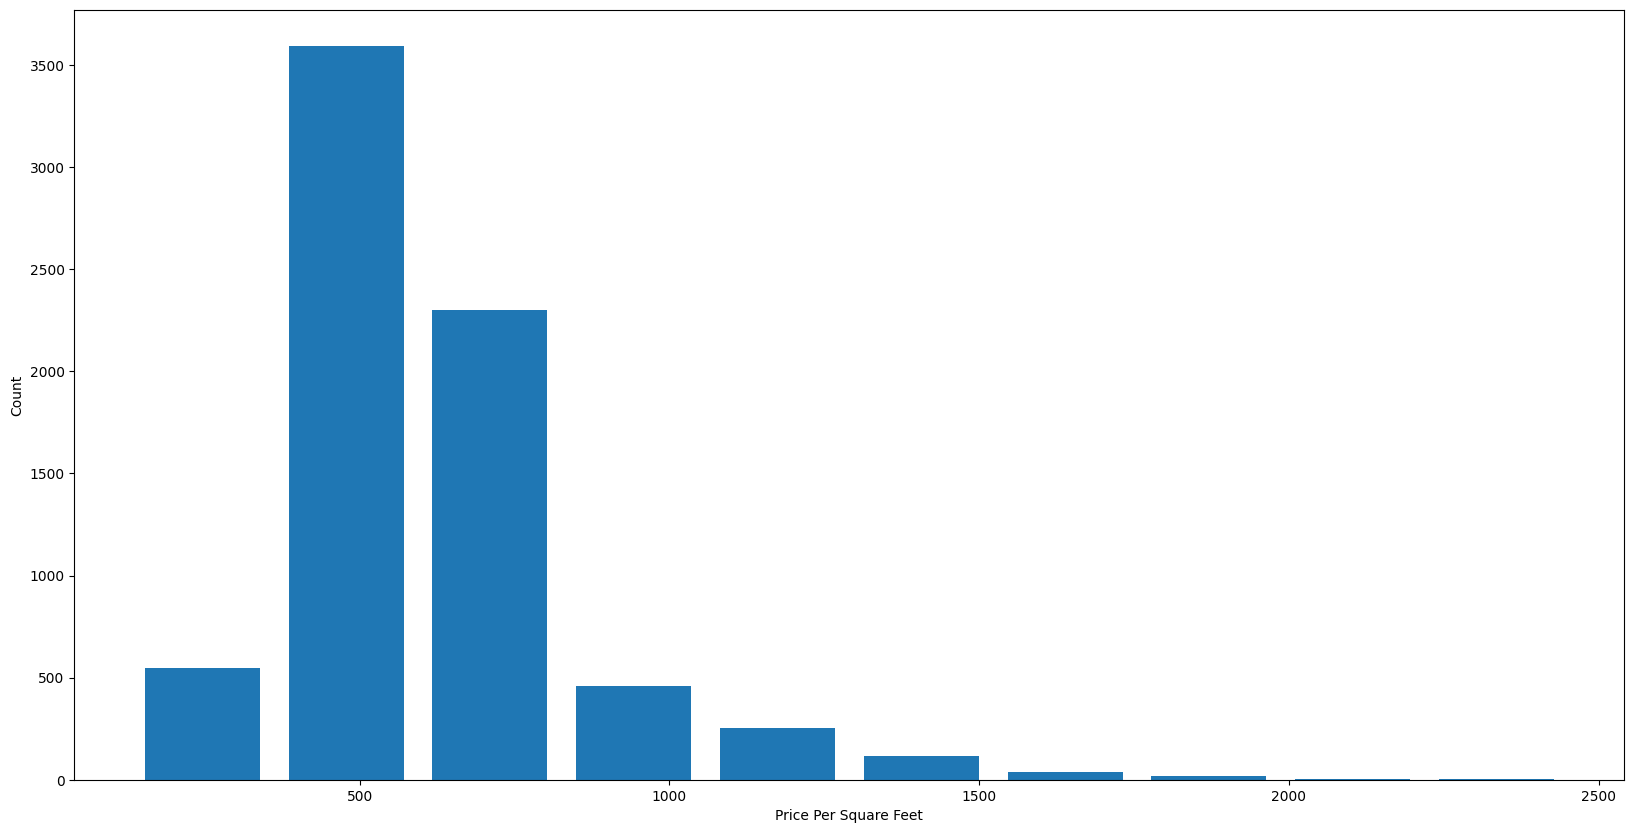

In [102]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df.price_per_sq_feet,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [104]:
df.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

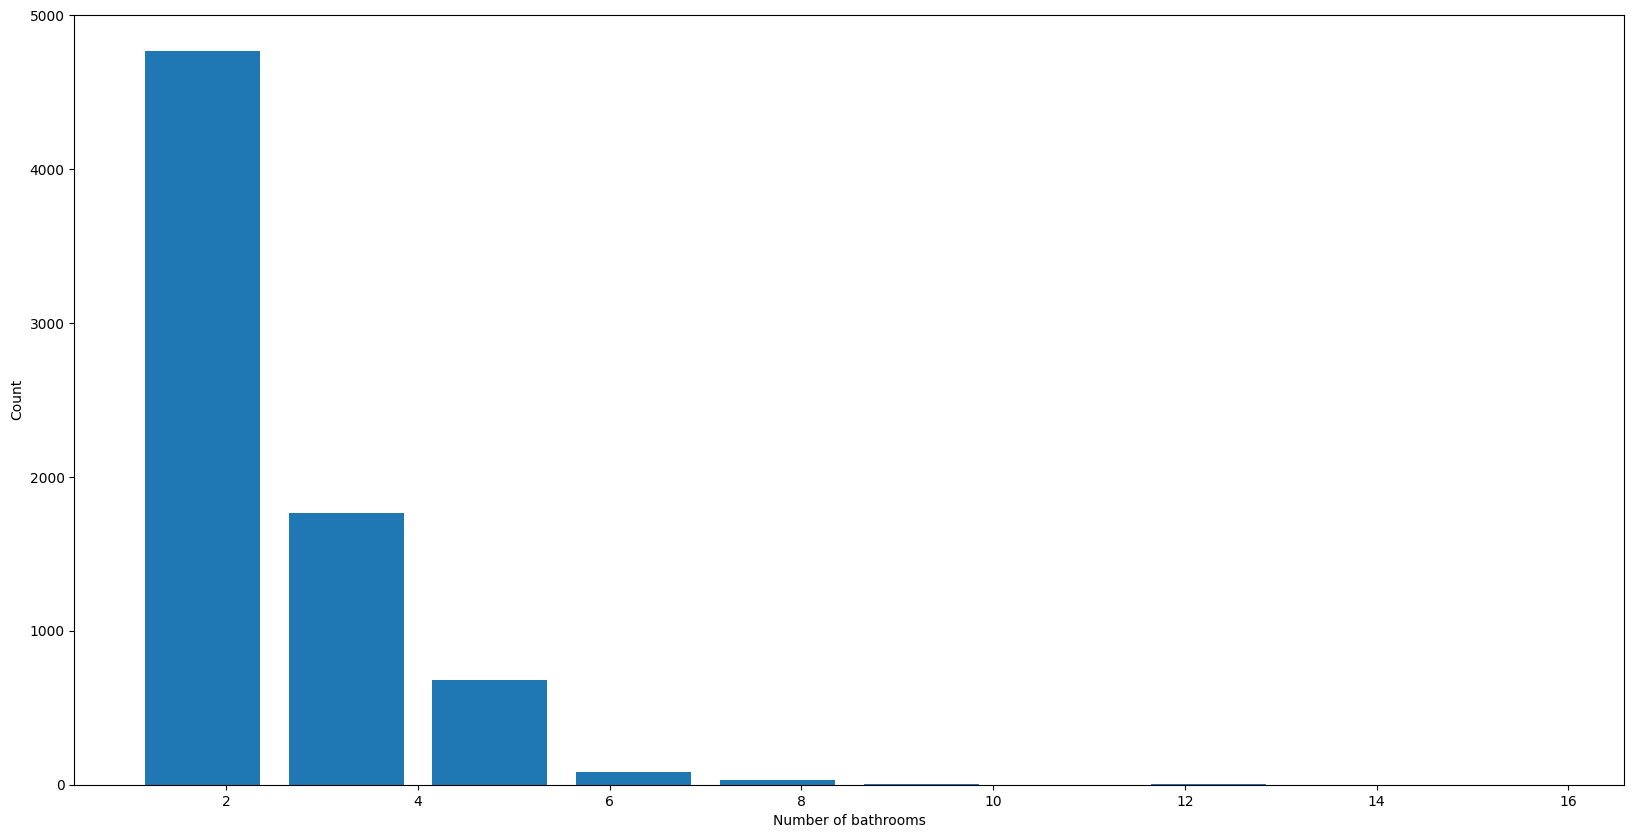

In [105]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [107]:

df[df.bath>10]

,location,bath,price,BHK,total_square,price_per_sq_feet
5277,Neeladri Nagar,12.0,160.0,10,4000.0,400.000000
8486,other,12.0,525.0,10,12000.0,437.500000
8575,other,16.0,550.0,16,10000.0,550.000000
9308,other,12.0,150.0,11,6000.0,250.000000
9639,other,13.0,275.0,13,5425.0,506.912442


In [109]:
df[df.bath>df.BHK+2]

,location,bath,price,BHK,total_square,price_per_sq_feet
1626,Chikkabanavar,7.0,80.0,4,2460.0,325.203252
5238,Nagasandra,8.0,450.0,4,7000.0,642.857143
6711,Thanisandra,6.0,116.0,3,1806.0,642.303433
8411,other,9.0,1000.0,6,11338.0,881.989769


In [110]:
df = df[df.bath<df.BHK+2]
df.shape

(7251, 6)

In [111]:
df.head(2)

,location,bath,price,BHK,total_square,price_per_sq_feet
0,1st Block Jayanagar,4.0,428.0,4,2850.0,1501.754386
1,1st Block Jayanagar,3.0,194.0,3,1630.0,1190.184049


In [114]:
df = df.drop('price_per_sq_feet' ,axis='columns')
df.head(3)

,location,bath,price,BHK,total_square
0,1st Block Jayanagar,4.0,428.0,4,2850.0
1,1st Block Jayanagar,3.0,194.0,3,1630.0
2,1st Block Jayanagar,2.0,235.0,3,1875.0


# One hot encoding

In [116]:
dummies = pd.get_dummies(df.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [118]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
df.head()

,location,bath,price,BHK,total_square,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4.0,428.0,4,2850.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,3.0,194.0,3,1630.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,2.0,235.0,3,1875.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,2.0,130.0,3,1200.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,2.0,148.0,2,1235.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [119]:
df = df.drop('location',axis='columns')
df.head(2)

,bath,price,BHK,total_square,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,428.0,4,2850.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,194.0,3,1630.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Building a model

In [121]:
X = df.drop(['price'],axis='columns')
X.head(3)

,bath,BHK,total_square,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,4,2850.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,3,1630.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,3,1875.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [123]:
y = df.price
y.head(3)

,price
0,428.0
1,194.0
2,235.0


In [124]:
len(y)

7251

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [126]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697874188

In [129]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [133]:
y_pred = lr_clf.predict(X_test)

In [134]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_absolute_error = mean_absolute_error(y_test, y_pred)
mean_squared_error = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)


print(f"Mean Absolute Error: {mean_absolute_error}")
print(f"Mean Squared Error: {mean_squared_error}")
print(f"R-squared: {r2_score}")

Mean Absolute Error: 16.59489799414972
Mean Squared Error: 783.2659935250767
R-squared: 0.8452277697874188


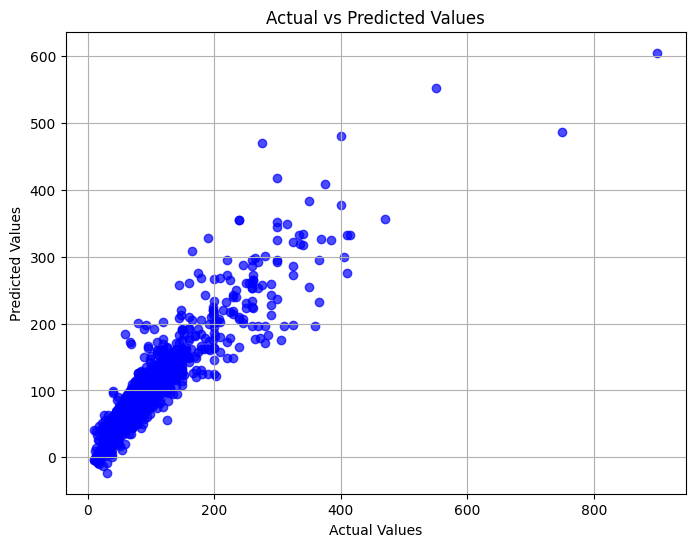

In [143]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(y_test, y_pred, c='blue', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

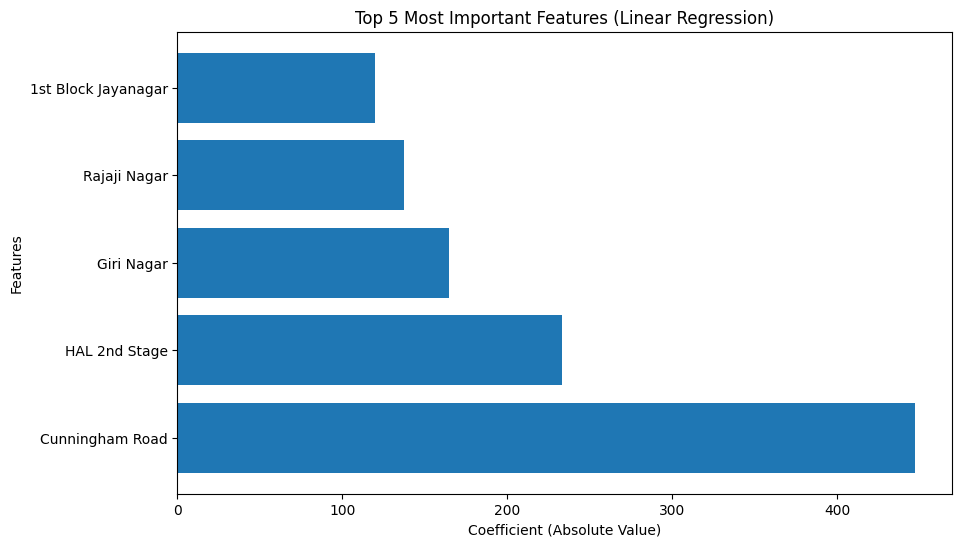

In [146]:
# Feature  importance

coefficients = lr_clf.coef_

# Create a DataFrame for easier visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importances = feature_importances.sort_values('Coefficient', ascending=False)

# Select top N features (e.g., top 5)
top_n = 5
top_features = feature_importances.head(top_n)

# Plot coefficients (absolute values) for top features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], np.abs(top_features['Coefficient']))
plt.xlabel('Coefficient (Absolute Value)')
plt.ylabel('Features')
plt.title(f'Top {top_n} Most Important Features (Linear Regression)')
plt.show()